# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [4]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)

Y = df.pIC50

## **3. Data pre-processing**

In [11]:
# Examine X dimension
X.shape

(6642, 881)

In [13]:
Y.shape

(6642,)

In [15]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(6642, 144)

In [17]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, Y_train.shape

((5313, 144), (5313,))

In [21]:
X_test.shape, Y_test.shape

((1329, 144), (1329,))

## Checking for missing values 

In [24]:
import numpy as np

print("Total missing values in X_train:", np.isnan(X_train).sum())
print("Total missing values in X_test:", np.isnan(X_test).sum())
print("Total missing values in Y_train:", np.isnan(Y_train).sum())
print("Total missing values in Y_test:", np.isnan(Y_test).sum())


Total missing values in X_train: 144
Total missing values in X_test: 0
Total missing values in Y_train: 0
Total missing values in Y_test: 0


In [26]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy="mean")  # Change to "median" if needed

# Fit and transform `X_train`
X_train_imputed = imputer.fit_transform(X_train)

# Transform `X_test` using the same imputer
X_test_imputed = imputer.transform(X_test)


In [28]:
print("Total missing values in X_train:", np.isnan(X_train).sum())
print("Total missing values in X_test:", np.isnan(X_test).sum())
print("Total missing values in Y_train:", np.isnan(Y_train).sum())
print("Total missing values in Y_test:", np.isnan(Y_test).sum())

Total missing values in X_train: 144
Total missing values in X_test: 0
Total missing values in Y_train: 0
Total missing values in Y_test: 0


In [30]:
print("Contains Inf in Y_train:", np.isinf(Y_train).sum())
print("Contains Inf in Y_test:", np.isinf(Y_test).sum())


Contains Inf in Y_train: 1
Contains Inf in Y_test: 0


Since inf is an extreme outlier, replacing it with the median of Y_train is a good approach:

In [33]:
Y_train = Y_train.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
Y_train = Y_train.fillna(Y_train.median())  # Replace NaN with the median


## **4. Compare ML algorithms**

In [38]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [01:12<00:01,  1.34s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 5313, number of used features: 144
[LightGBM] [Info] Start training from score 5.812550


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:12<00:00,  1.73s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:04<00:00,  1.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 5313, number of used features: 144
[LightGBM] [Info] Start training from score 5.812550


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:04<00:00,  1.53s/it]


In [40]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.83,0.84,0.63,0.18
ExtraTreeRegressor,0.83,0.84,0.63,0.15
ExtraTreesRegressor,0.83,0.84,0.63,9.86
GaussianProcessRegressor,0.83,0.84,0.63,13.05
RandomForestRegressor,0.78,0.79,0.72,8.29
BaggingRegressor,0.76,0.76,0.76,1.00
XGBRegressor,0.75,0.76,0.77,0.29
MLPRegressor,0.72,0.73,0.81,5.66
HistGradientBoostingRegressor,0.54,0.56,1.04,3.12


In [42]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.31,0.39,1.21,2.84
RandomForestRegressor,0.31,0.38,1.21,8.90
LGBMRegressor,0.31,0.38,1.22,0.27
SVR,0.28,0.36,1.24,4.05
NuSVR,0.27,0.35,1.25,3.89
XGBRegressor,0.27,0.35,1.25,0.22
BaggingRegressor,0.26,0.34,1.26,0.87
KNeighborsRegressor,0.21,0.29,1.30,0.16
GradientBoostingRegressor,0.19,0.28,1.31,2.76


## **5. Data visualization of model performance**

[(0.0, 1.0)]

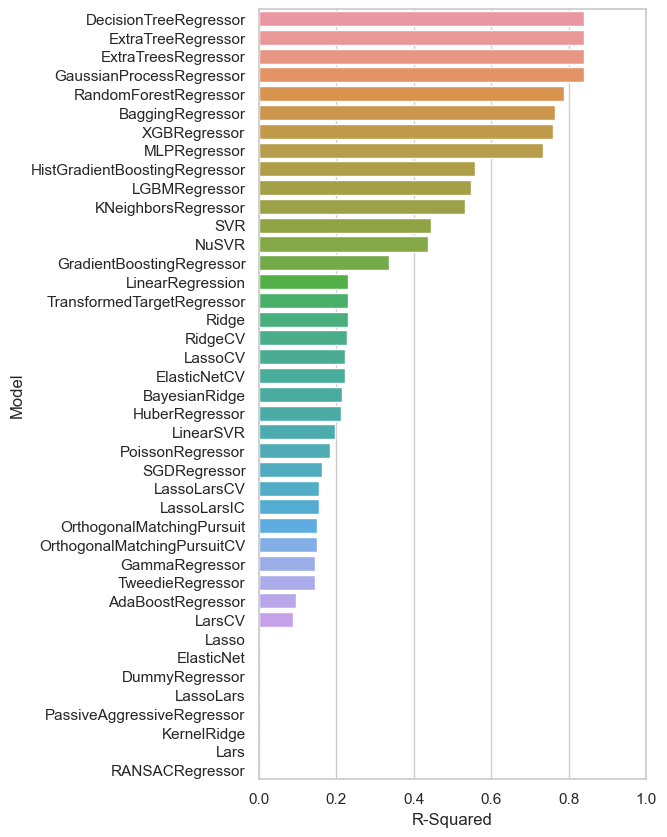

In [45]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

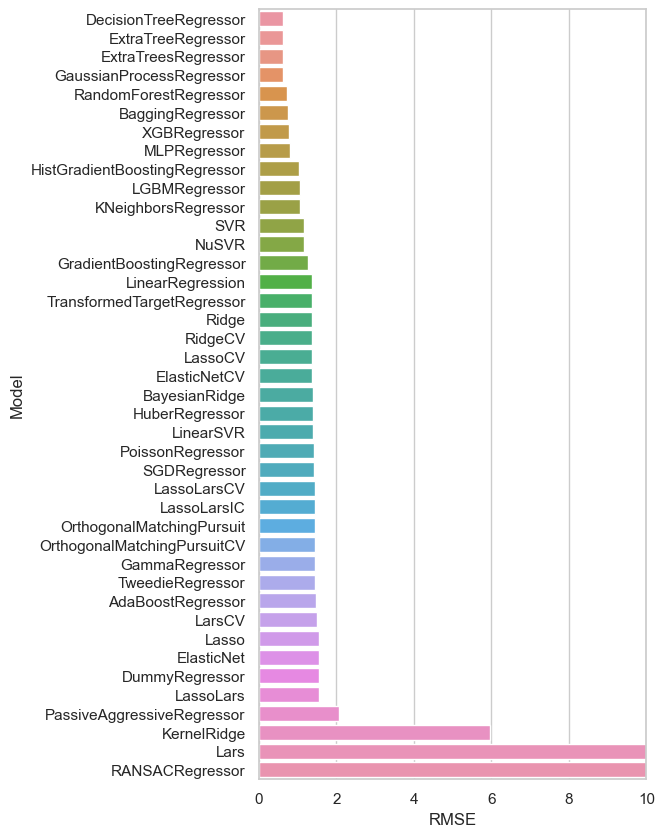

In [47]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

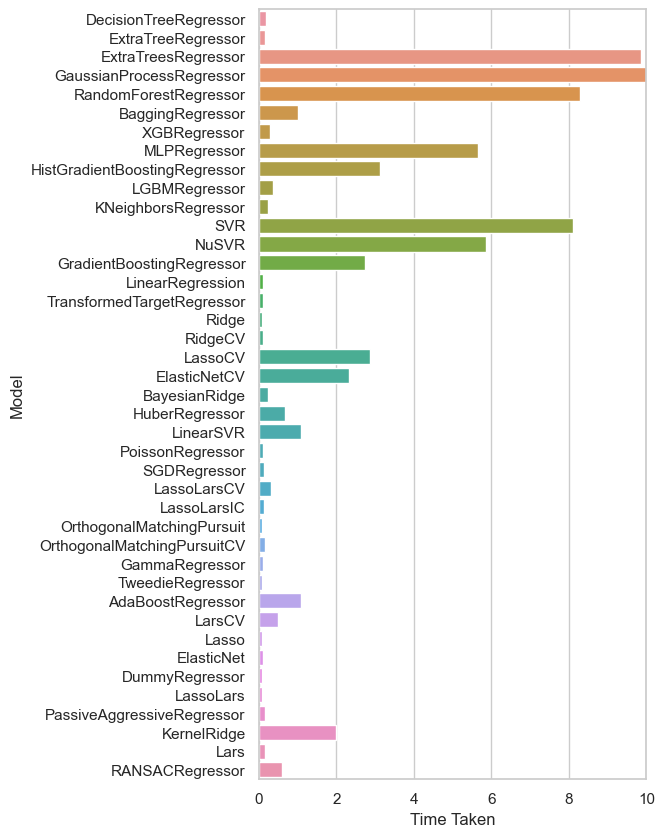

In [49]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))